<h1 style="text-align: center;">Python</h1>

>Total Marks: 40
>>
Each question 10 marks 

## Question: 1


You have an input dictionary given,

input_dict = {"abc":{"def":{"ghi":{"jkl":{"mno":{"pqr":{"stu":{"vwx":{"yz":"you are finally here !!!"}}}}}}}}}

Task:  You have to write a Python function that will take this input and print it like that,

output =   
{"abc":["def","ghi","jkl","mno","pqr","stu","vwx","yz"],  
 "def":["ghi","jkl","mno","pqr","stu","vwx","yz"],  
 "ghi":["jkl","mno","pqr","stu","vwx","yz"],  
 "jkl":["mno","pqr","stu","vwx","yz"],  
 "mno":["pqr","stu","vwx","yz"],  
 "pqr":["stu","vwx","yz"],  
 "stu":["vwx","yz"],  
 "vwx":["yz"],  
 "yz":["you are finally here !!!"]}  

In [199]:
from pprint import pprint

data = {"abc":{"def":{"ghi":{"jkl":{"mno":{"pqr":{"stu":{"vwx":{"yz":"you are finally here !!!"}}}}}}}}}

def a_particular_style(data):
    ret = {}
    for k, v in data.items():
        if isinstance(v, dict):
            d = a_particular_style(v)
            ret.update(d)
            ret[k] = list(reversed(d))
        else:
            ret[k] = [v]
    return ret

pprint(a_particular_style(data))

{'abc': ['def', 'ghi', 'jkl', 'mno', 'pqr', 'stu', 'vwx', 'yz'],
 'def': ['ghi', 'jkl', 'mno', 'pqr', 'stu', 'vwx', 'yz'],
 'ghi': ['jkl', 'mno', 'pqr', 'stu', 'vwx', 'yz'],
 'jkl': ['mno', 'pqr', 'stu', 'vwx', 'yz'],
 'mno': ['pqr', 'stu', 'vwx', 'yz'],
 'pqr': ['stu', 'vwx', 'yz'],
 'stu': ['vwx', 'yz'],
 'vwx': ['yz'],
 'yz': ['you are finally here !!!']}


## Question: 2


Given an array of length ‘N’, where each element denotes the position of a stall. Now you have ‘N’ stalls and an integer ‘K’ which denotes the number of horses that are mad. To prevent the horses from hurting each other, you need to assign the horses to the stalls, such that the minimum distance between any two of them is as large as possible. Return the largest minimum distance.

array: 1,2,4,8,9  &  k=3

O/P: 3

Explanation: 1st horse at stall 1, 2nd horse at stall 4 and 3rd horse at stall 8

In [186]:
def can_place_horses(stalls, k, min_distance):
    count = 1
    last_position = stalls[0]

    for i in range(1, len(stalls)):
        if stalls[i] - last_position >= min_distance:
            count += 1
            last_position = stalls[i]

    return count >= k

def largest_min_distance(stalls, k):
    stalls.sort()

    low, high = 0, stalls[-1] - stalls[0]
    result = -1

    while low <= high:
        mid = low + (high - low) // 2

        if can_place_horses(stalls, k, mid):
            result = mid
            low = mid + 1
        else:
            high = mid - 1

    return result

# Example usage:
stalls = [1, 2, 4, 8, 9]
k = 3
output = largest_min_distance(stalls, k)
print("Output:", output)

Output: 3


## Question: 3

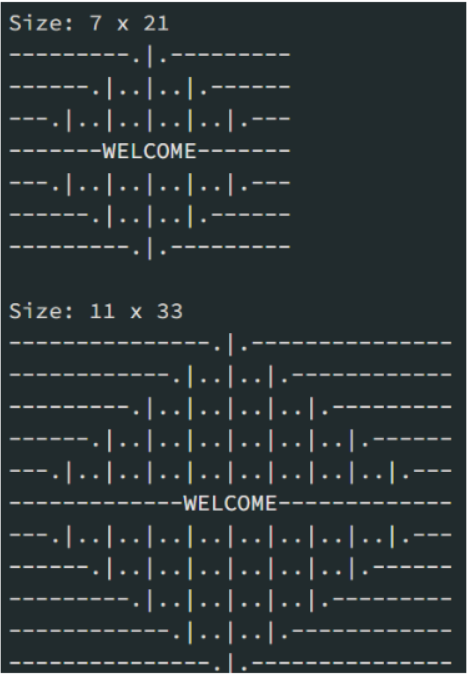

Mr. Karthiken works in a door mat manufacturing company. One day, he designed a new door mat with the following specifications:

             a) Mat size must be N X M. (N is an odd natural number, and M is 3 times N.)
              b) The design should have ‘WELCOME’ written in the center.
              c) The design pattern should only use |, . and – character
    Sample Design is given above image, Write a python code fo.r this

In [1]:
def generate_door_mat(n):
  """
  This function generates a door mat design with 'WELCOME' in the center.

  Args:
      n: An odd natural number representing the width of the door mat.

  Returns:
      A list of strings representing the lines of the door mat design.
  """
  # Width of the door mat (M is 3 times N)
  width = n * 3

  # Calculate the number of '-' characters to use for centering
  center_padding = (width - len("WELCOME")) // 2

  # Initialize an empty list to store the door mat lines
  door_mat = []

  # Generate the top half of the design
  for i in range(1, n, 2):
    # Calculate the number of dots and '-' characters for each line
    dots = (width - i * 3) // 2
    line = "-" * dots + ".|." * i + "-" * dots
    door_mat.append(line)

  # Add the line with "WELCOME" centered
  door_mat.append("-" * center_padding + "WELCOME" + "-" * center_padding)

  # Generate the bottom half of the design (reverse of top half)
  for i in range(n - 2, -1, -2):
    dots = (width - i * 3) // 2
    line = "-" * dots + ".|." * i + "-" * dots
    door_mat.append(line)

  return door_mat

# Example usage
n = 7  # Replace with the desired odd natural number
door_mat = generate_door_mat(n)

# Print the door mat design
for line in door_mat:
  print(line)


---------.|.---------
------.|..|..|.------
---.|..|..|..|..|.---
-------WELCOME-------
---.|..|..|..|..|.---
------.|..|..|.------
---------.|.---------


## Question: 4

Given an array nums of n integers, return an array of all the unique quadruplets [nums[a], nums[b], nums[c], nums[d]] such that:  

    a. 0 <= a, b, c, d < n    
    b. a, b, c, and d are distinct.    
    c. nums[a] + nums[b] + nums[c] + nums[d] == target    

In [187]:
def four_sum(nums, target):
    nums.sort()
    result = []

    for a in range(len(nums) - 3):
        if a > 0 and nums[a] == nums[a - 1]:
            continue

        for b in range(a + 1, len(nums) - 2):
            if b > a + 1 and nums[b] == nums[b - 1]:
                continue

            left, right = b + 1, len(nums) - 1

            while left < right:
                current_sum = nums[a] + nums[b] + nums[left] + nums[right]

                if current_sum == target:
                    result.append([nums[a], nums[b], nums[left], nums[right]])

                    while left < right and nums[left] == nums[left + 1]:
                        left += 1

                    while left < right and nums[right] == nums[right - 1]:
                        right -= 1

                    left += 1
                    right -= 1
                elif current_sum < target:
                    left += 1
                else:
                    right -= 1

    return result

# Example usage:
nums = [1, 0, -1, 0, -2, 2]
target = 0
output = four_sum(nums, target)
print("Output:", output)

Output: [[-2, -1, 1, 2], [-2, 0, 0, 2], [-1, 0, 0, 1]]


<h1 style="text-align: center;">SQL</h1>

>Total Marks: 40
>>
Each question 10 marksks 

## Question: 1

Given the following table

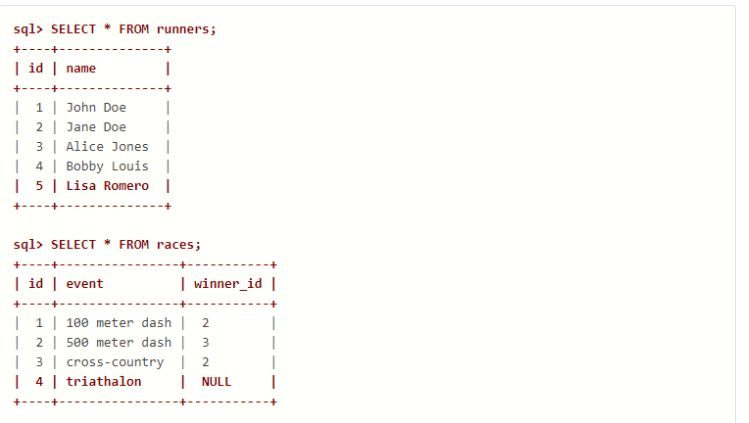

What will be the result of the query below?

SELECT * FROM runners WHERE id NOT IN (SELECT winner_id FROM races)

Explain your answer and also provide an alternative version of this query that will avoid the issue that it exposes.s:

`Answer`

    SELECT * FROM runners WHERE id NOT IN (SELECT winner_id FROM races)
    This query selects all rows from the runners table where the id does not match any winner_id from the races table.
    
    Given the provided data:
    
    In the runners table, the id values are: 1, 2, 3, 4, 5. In the races table, the winner_id values are: 2, 3, NULL. So, the subquery (SELECT winner_id FROM races) returns the values: 2, 3, and NULL.
    
    The outer query selects all rows from the runners table where the id is not in the list [2, 3, NULL]. However, when comparing with NULL, the result is UNKNOWN, not true or false. So, if there's any NULL in the subquery result, it will filter out all rows from the outer query, regardless of other values. In this case, the id 1, 4, and 5 will be filtered out because NULL is included in the list.
    
    The correct result should only be the runners who haven't won any races. In this case, it's John Doe (id: 1) and Bobby Louis (id: 4).
    
    To avoid this issue, you can use a LEFT JOIN instead of a subquery with IN:
    
    SELECT runners.*
    FROM runners
    LEFT JOIN races ON runners.id = races.winner_id
    WHERE races.winner_id IS NULL;

## Question: 2

Given two tables created as follows

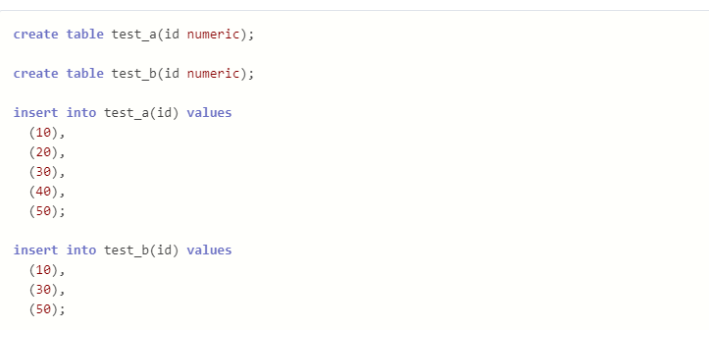

Write a query to fetch values in table test_a that are and not in test_b without using the NOT keyword.

`Answer`

    SELECT id FROM test_a
    EXCEPT
    SELECT id FROM test_b;

## Question: 3

Given the following tables:

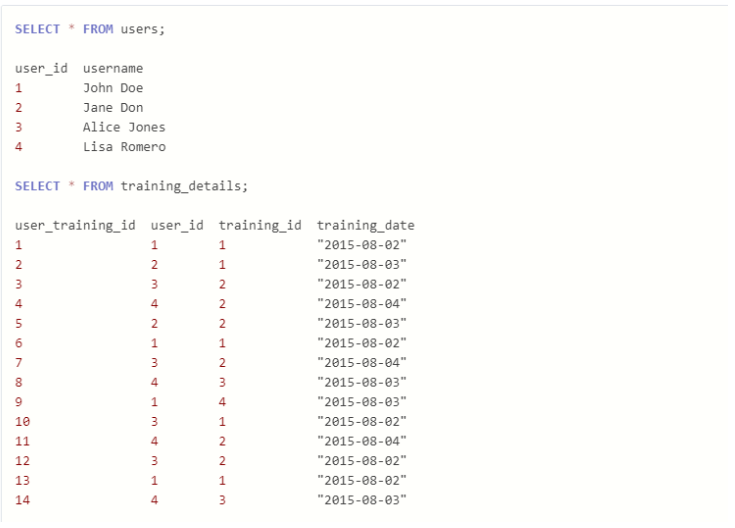

Write a query to to get the list of users who took the a training lesson more than once in the same day, grouped by user and training lesson, each ordered from the most recent lesson date to oldest date.

`Answer`

    SELECT 
        u.user_id,
        u.username,
        td.training_id,
        td.training_date,
        COUNT(*) AS num_lessons_taken
    FROM 
        users u
    JOIN 
        training_details td ON u.user_id = td.user_id
    GROUP BY 
        u.user_id,
        u.username,
        td.training_id,
        td.training_date
    HAVING 
        COUNT(*) > 1
    ORDER BY 
        td.training_date DESC;

## Question: 4

Consider the Employee table below.

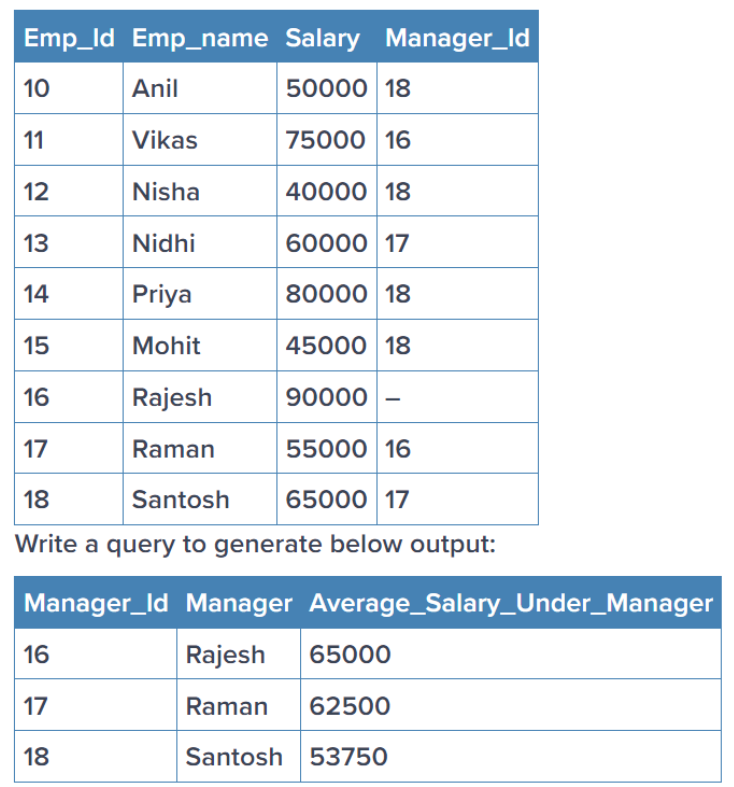

`Answer`

    SELECT Manager_id, Manager, AVG(Salary) AS Average_Salary, COUNT(*) AS Under_Manager
    FROM (
        SELECT Manager_id, Emp_name AS Manager, Salary
        FROM employee
        WHERE Manager_id IS NOT NULL
    ) AS managers
    GROUP BY Manager_id;

<h1 style="text-align: center;">Machine learning</h1>

>Total Marks: 60  
>Each question 20 marks

## Question: 1

Imagine you have a dataset where you have different Instagram features like u sername , Caption , Hashtag , Followers , Time_Since_posted , and likes , now your task is to predict the number of likes and Time Since posted and the rest of the features are your input features. Now you have to build a model which can predict the number of likes and Time Since posted. 
Dataset This is the Dataset You can use this dataset for this question. 

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [62]:
df=pd.read_csv("instagram_reach.csv")

In [63]:
df.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [64]:
df.tail()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
95,8,19,michaelgarza__,"328 S. Wetherly Drive, Beverly Hills, CA 90212...",614,#beverlyhills #realestate#losangelesrealestate...,3 hours,31
96,9,21,dvlp_search,Credit @tristankappel To find more dvlp follow...,450,#workspace #work #developer#development #devel...,3 hours,42
97,10,22,ecom.space,We are coming up with the Best 21 Books that w...,182,#books #book #motivation #inspiration #life#bo...,3 hours,10
98,11,24,lb3enterprises,We’re only paid to move dirt once. It’s not ju...,2039,#heavyequipment #underconstruction#dozer #real...,3 hours,222
99,12,25,palmariusdev,Obtén tu tienda en línea ahora.,741,#marketing #programming#development #desarroll...,3 hours,109


In [65]:
df.shape

(100, 8)

In [66]:
df=df.drop(columns=['Unnamed: 0','S.No'])

In [67]:
df.head()

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [68]:
df.columns

Index(['USERNAME', 'Caption', 'Followers', 'Hashtags', 'Time since posted',
       'Likes'],
      dtype='object')

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   USERNAME           100 non-null    object
 1   Caption            94 non-null     object
 2   Followers          100 non-null    int64 
 3   Hashtags           100 non-null    object
 4   Time since posted  100 non-null    object
 5   Likes              100 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 4.8+ KB


In [71]:
df.describe()

,Followers,Likes
count,100.00000,100.00000
mean,961.96000,46.48000
std,1014.62567,55.08698
min,11.00000,8.00000
25%,252.75000,19.00000
50%,612.00000,29.00000
75%,1197.00000,46.00000
max,4496.00000,349.00000


In [72]:
df.dtypes

USERNAME             object
Caption              object
Followers             int64
Hashtags             object
Time since posted    object
Likes                 int64
dtype: object

In [73]:
df.isnull().sum()

USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [74]:
df.duplicated().sum()

0

In [75]:
num_col=[fea for fea in df.columns if df[fea].dtypes!="o"]

In [76]:
num_col

['USERNAME', 'Caption', 'Followers', 'Hashtags', 'Time since posted', 'Likes']

In [77]:
cat_col=[fea for fea in df.columns if df[fea].dtypes=="o"]

In [78]:
cat_col

[]

In [79]:
df.nunique()

USERNAME             95
Caption              94
Followers            94
Hashtags             98
Time since posted    11
Likes                55
dtype: int64

### Statistical analysis

In [80]:
df.corr()

,Followers,Likes
Followers,1.000000,0.266218
Likes,0.266218,1.000000


In [81]:
df.corr( method='spearman')

,Followers,Likes
Followers,1.000000,0.353675
Likes,0.353675,1.000000


### Preprocessing

In [82]:
df['Time since posted']

0     11 hours
1      2 hours
2      2 hours
3      3 hours
4      3 hours
        ...   
95     3 hours
96     3 hours
97     3 hours
98     3 hours
99     3 hours
Name: Time since posted, Length: 100, dtype: object

In [83]:
# Convert 'Time since posted' to numerical format (hours)
df['Time since posted'] = df['Time since posted'].str.extract('(\d+)').astype(float)

In [84]:
df['Time since posted']

0     11.0
1      2.0
2      2.0
3      3.0
4      3.0
      ... 
95     3.0
96     3.0
97     3.0
98     3.0
99     3.0
Name: Time since posted, Length: 100, dtype: float64

In [85]:
# Feature engineering on hashtags (count of hashtags)
df['Num_Hashtags'] = df['Hashtags'].apply(lambda x: len(x.split()))

In [86]:
df['Num_Hashtags']

0      5
1     19
2     20
3     20
4     18
      ..
95    10
96    21
97    22
98    21
99    22
Name: Num_Hashtags, Length: 100, dtype: int64

In [88]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
username_encoded = pd.get_dummies(df['USERNAME'], prefix='user')
hashtags_encoded = pd.get_dummies(df['Hashtags'].apply(lambda x: ' '.join(x.split())), prefix='tag')

In [89]:
# Combine encoded features with the original DataFrame
df = pd.concat([df, username_encoded, hashtags_encoded], axis=1)

In [90]:
# Drop unnecessary columns
df.drop(['USERNAME', 'Caption', 'Hashtags'], axis=1, inplace=True)

In [91]:
# Encode the target variable 'Likes' using LabelEncoder (optional)
label_encoder = LabelEncoder()
df['Likes'] = label_encoder.fit_transform(df['Likes'])

### Splitting data

In [92]:
# Features (X) and target variables (y)
X = df.drop('Likes', axis=1)
y_likes = df['Likes']
y_time = df['Time since posted']

In [93]:
from sklearn.model_selection import train_test_split
# Train-test split
X_train, X_test, y_likes_train, y_likes_test, y_time_train, y_time_test = train_test_split(
    X, y_likes, y_time, test_size=0.2, random_state=42)

### Scaling

In [94]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

### Model building and Evaluation

In [95]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

In [96]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVR': SVR(),
    'KNeighbors': KNeighborsRegressor()
}  

In [97]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [98]:
for model_name, model in models.items():
    # For predicting likes
    model.fit(X_train, y_likes_train)
    likes_predictions = model.predict(X_test)
    
    # For predicting time
    model.fit(X_train, y_time_train)
    time_predictions = model.predict(X_test)
    
    mae_likes = mean_absolute_error(y_likes_test, likes_predictions)
    mae_time = mean_absolute_error(y_time_test, time_predictions)
    
    r2_likes = r2_score(y_likes_test, likes_predictions)
    r2_time = r2_score(y_time_test, time_predictions)
    
    print(f"{model_name} - Likes: MAE={mae_likes}, R^2={r2_likes}")
    print(f"{model_name} - Time: MAE={mae_time}, R^2={r2_time}")
    print("-----------------------------------------------------")

Linear Regression - Likes: MAE=9.051710703552661, R^2=0.3272282165135876
Linear Regression - Time: MAE=0.2981680707068831, R^2=0.9918463741474709
-----------------------------------------------------
Decision Tree - Likes: MAE=8.05, R^2=0.37650497688613027
Decision Tree - Time: MAE=0.6, R^2=0.785361665593475
-----------------------------------------------------
AdaBoost - Likes: MAE=7.907524697414618, R^2=0.5287046380587002
AdaBoost - Time: MAE=0.2659722222222222, R^2=0.9458493649620143
-----------------------------------------------------
Gradient Boosting - Likes: MAE=6.793911038348993, R^2=0.5817770238698281
Gradient Boosting - Time: MAE=0.20084112606394794, R^2=0.9568269182633857
-----------------------------------------------------
SVR - Likes: MAE=10.812256303383455, R^2=-0.04231228243899299
SVR - Time: MAE=1.9908756454670864, R^2=-0.15007545478790663
-----------------------------------------------------
KNeighbors - Likes: MAE=11.1, R^2=-0.21866106954763787
KNeighbors - Time: MA

## Question: 2   
Train an SVM regressor on : Bengaluru housing datase    
   Must include in details:

  - EDA

  - Feature engineering 

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [100]:
df=pd.read_csv("Bengaluru_House_Data.csv")

In [101]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [102]:
df.nunique()

area_type          4
availability      81
location        1305
size              31
society         2688
total_sqft      2117
bath              19
balcony            4
price           1994
dtype: int64

In [103]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [104]:
# Display summary statistics of numerical columns
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [105]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [106]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [107]:
# Handle missing values
df = df.dropna()

In [108]:
df.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

### Visualize Data:

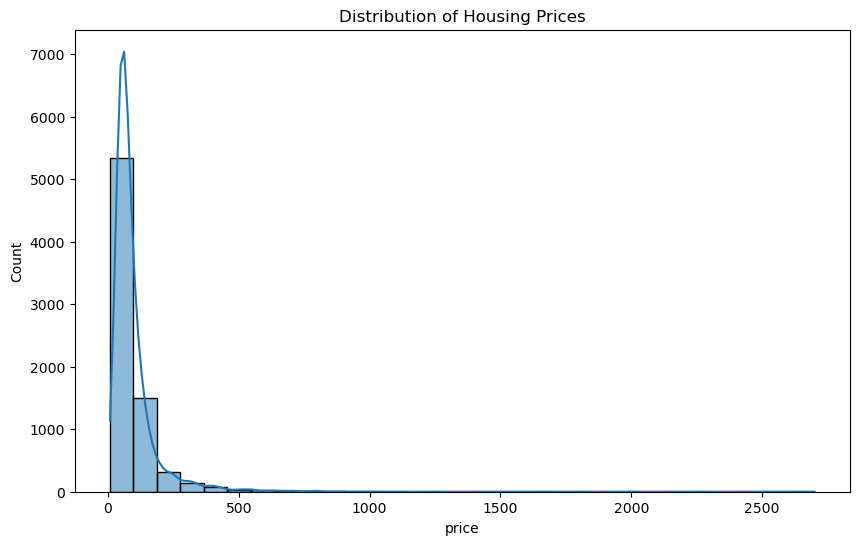

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of 'price'
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Housing Prices')
plt.show()

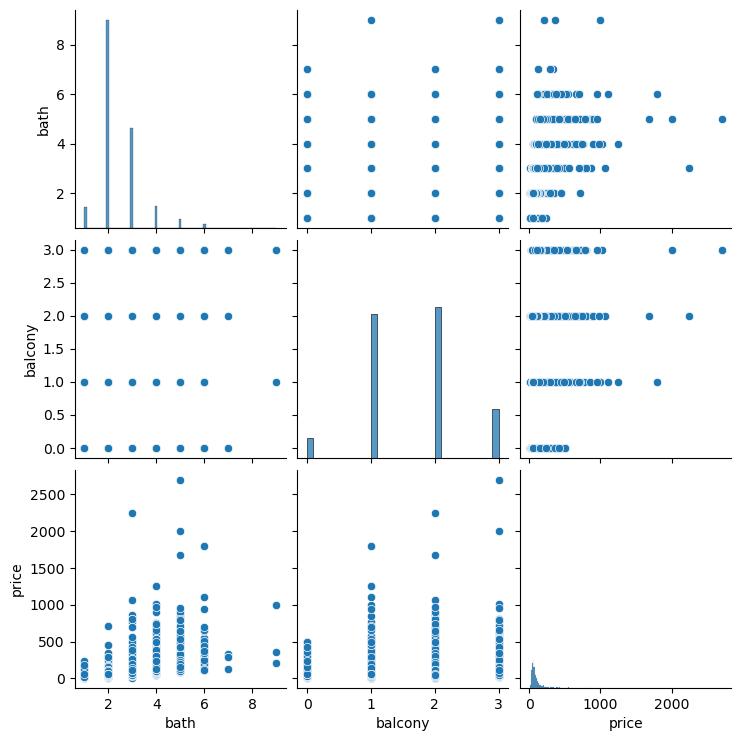

In [110]:
# Visualize relationships between features and target variable
sns.pairplot(df[['total_sqft', 'bath', 'balcony', 'price']])
plt.show()

In [113]:
df.corr()

,bath,balcony,price
bath,1.000000,0.275726,0.594844
balcony,0.275726,1.000000,0.170138
price,0.594844,0.170138,1.000000


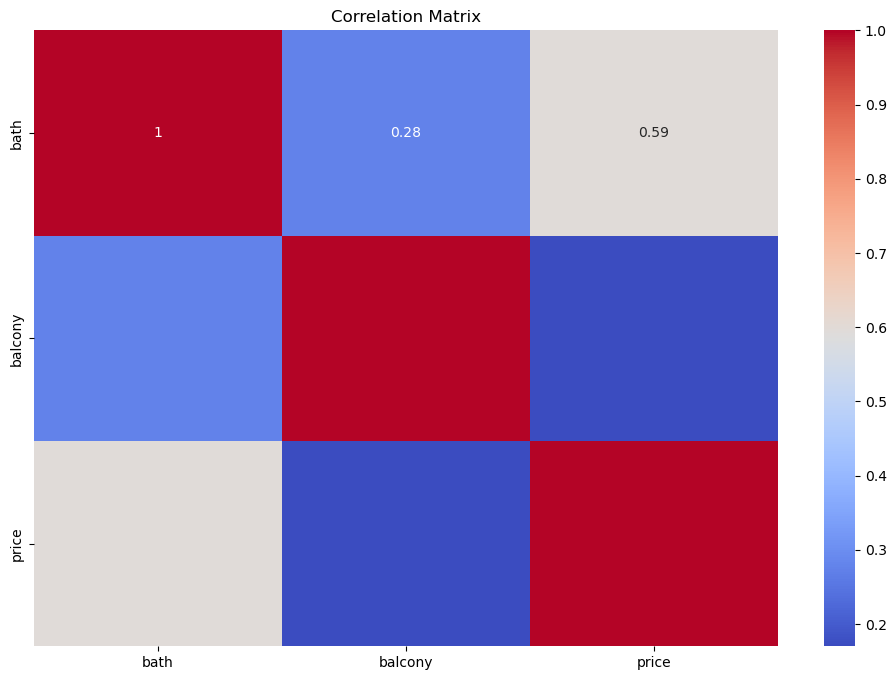

In [112]:
# Explore correlations
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Feature Engineering

In [114]:
df['total_sqft'].value_counts()

1200           172
1100           106
1000            78
1500            74
1300            71
              ... 
2383             1
1103             1
1145 - 1340      1
3080             1
4689             1
Name: total_sqft, Length: 1682, dtype: int64

In [115]:
# Feature Engineering:

# Convert 'total_sqft' to numerical format (handle ranges and other non-numeric values)
def convert_total_sqft(total_sqft):
    try:
        # Check if the value is a range
        if '-' in total_sqft:
            tokens = total_sqft.split('-')
            return (float(tokens[0]) + float(tokens[1])) / 2
        # If it's a single value, convert to float
        return float(total_sqft)
    except:
        # If conversion fails, return NaN
        return None

In [116]:
# Apply the conversion function to 'total_sqft'
df['total_sqft'] = df['total_sqft'].apply(convert_total_sqft)

In [118]:
# Drop rows with missing values in 'total_sqft'
df = df.dropna(subset=['total_sqft'])

### Splitting the data

In [119]:
# Assume 'location', 'size', 'total_sqft', 'bath', 'balcony', etc., are features
X = df[['area_type', 'availability', 'location', 'size', 'society','total_sqft', 'bath', 'balcony']]

# Target variable
y = df['price']

### Encoding

In [120]:
# Convert categorical features using one-hot encoding or label encoding
X = pd.get_dummies(X, columns=['area_type', 'availability', 'location', 'size', 'society'], drop_first=True)

In [121]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=20)

### Scaling

In [122]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

### Model Bulding and Evaluation

In [124]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [125]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVR': SVR(),
    'KNeighbors': KNeighborsRegressor()
}  

In [126]:
for model_name, model in models.items():
    # For predicting price
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, predictions)
    
    r2 = r2_score(y_test, predictions)
    
    print(f"{model_name} - Likes: MAE={mae}, R^2={r2}")
    print("-----------------------------------------------------")

Linear Regression - Likes: MAE=1566360680988138.0, R^2=-2.4979697682909206e+27
-----------------------------------------------------
Decision Tree - Likes: MAE=20.843904147687464, R^2=0.7529052574831523
-----------------------------------------------------
AdaBoost - Likes: MAE=37.44784062879451, R^2=0.5781608564292008
-----------------------------------------------------
Gradient Boosting - Likes: MAE=22.944515179725737, R^2=0.7403043903633062
-----------------------------------------------------
SVR - Likes: MAE=45.82782364881454, R^2=-0.022684095227433643
-----------------------------------------------------
KNeighbors - Likes: MAE=29.905856379425515, R^2=0.43597208501107
-----------------------------------------------------


## Question: 3

Train and fine tune a decision tree using the wine dataset by following the following steps:-

  1. Use load_wine() to generate wine dataset
  2. Split the dataset into train and test  dataset
  3. Use random search CV to hyperparameter tune the Decision Tree
  4. Try to achieve an accuracy of at least 85%


Grow a random forest using the following steps:-

  1. Continuing the previous question, create 10 subsets of the training dataset. You can use the              class for it.
  2. Train 1 decision tree on each subset, using the best hyperparameter values found in the previous question.
  3. Evaluate all the trees on the test dataset. Are they performing better than the tree created in the previous question?

In [127]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint
from sklearn.metrics import accuracy_score

### Step 1: Load wine dataset

In [128]:
wine = load_wine()
X, y = wine.data, wine.target

### Step 2: Split the dataset into train and test dataset

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 3: Use random search CV to hyperparameter tune the Decision Tree

In [130]:
param_dist = {
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'criterion': ['gini', 'entropy']
}

In [131]:
tree = DecisionTreeClassifier()
random_search = RandomizedSearchCV(tree, param_distributions=param_dist, n_iter=100, cv=5, random_state=42)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001AEFEA20F50>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001AEFE9C9A50>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001AEFE9AF1D0>},
                   random_state=42)

In [133]:
# Best hyperparameters
best_params = random_search.best_params_
best_params

{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 7}

### Step 4: Try to achieve an accuracy of at least 85%

In [134]:
best_tree = DecisionTreeClassifier(**best_params)
best_tree.fit(X_train, y_train)
y_pred = best_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [135]:
print(f"Best Decision Tree Accuracy: {accuracy*100:.2f}%")

Best Decision Tree Accuracy: 91.67%


## Random Forest:

In [136]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ShuffleSplit

### Step 1: Create 10 subsets of the training dataset using ShuffleSplit

In [137]:
n_splits = 10
shuffle_split = ShuffleSplit(n_splits=n_splits, test_size=0.2, random_state=42)

### Step 2: Train 1 decision tree on each subset using the best hyperparameter values

In [138]:
forest = RandomForestClassifier(**best_params, n_estimators=n_splits, random_state=42)

In [139]:
for train_index, _ in shuffle_split.split(X_train):
    forest.fit(X_train[train_index], y_train[train_index])

### Step 3: Evaluate all the trees on the test dataset

In [140]:
ensemble_predictions = [tree.predict(X_test) for tree in forest.estimators_]

In [141]:
# Check performance of each tree
for i, y_pred_tree in enumerate(ensemble_predictions):
    accuracy_tree = accuracy_score(y_test, y_pred_tree)
    print(f"Tree {i+1} Accuracy: {accuracy_tree*100:.2f}%")

Tree 1 Accuracy: 80.56%
Tree 2 Accuracy: 83.33%
Tree 3 Accuracy: 77.78%
Tree 4 Accuracy: 83.33%
Tree 5 Accuracy: 80.56%
Tree 6 Accuracy: 94.44%
Tree 7 Accuracy: 86.11%
Tree 8 Accuracy: 83.33%
Tree 9 Accuracy: 91.67%
Tree 10 Accuracy: 86.11%


In [142]:
# Overall performance of the Random Forest
ensemble_predictions_majority = [max(set(predictions), key=predictions.count) for predictions in zip(*ensemble_predictions)]
accuracy_forest = accuracy_score(y_test, ensemble_predictions_majority)

In [143]:
print(f"Random Forest Accuracy: {accuracy_forest*100:.2f}%")

Random Forest Accuracy: 88.89%


<h1 style="text-align: center;">Deep Learning</h1>

>Total Marks: 60  
>Each question 20 marks

## Question: 1

(a) Explain how you can implement DL in a real-world application.

(b) What is the use of Activation function in Artificial Neural Networks? What would be the problem if we don't use it in ANN networks.

`Answer:-`

(a). `Implementing Deep Learning (DL) in a real-world application involves several steps:`

    1. `Define the Problem:` Clearly define the problem you want to solve and determine if DL is the right approach. DL is suitable for tasks such as image and speech recognition, natural language processing, and more.

    2. `Collect and Preprocess Data:` Gather a sufficient amount of labeled data for training and testing. Preprocess the data to ensure it is in a suitable format and is representative of the real-world scenarios

    3. `Choose a DL Framework:` Select a deep learning framework such as TensorFlow, PyTorch, or Keras. These frameworks provide a set of tools and abstractions to simplify the implementation of neural networks.

    4. `Design the Neural Network Architecture:` Define the architecture of your neural network. This includes the number and type of layers, the activation functions, and the connections between neurons

    5. `Train the Model:` Split your dataset into training and testing sets. Train the model on the training set using an optimization algorithm, adjusting the weights and biases of the network to minimize the error

    6. `Validate and Tune:` Evaluate the model on the validation set to ensure it generalizes well to new data. Fine-tune hyperparameters and architecture based on performance

    7. `Deploy the Model:` Once satisfied with the model's performance, deploy it to the real-world environment. This could involve integrating it into a web application, a mobile app, or an embedded system.

    8. `Monitor and Update:` Regularly monitor the model's performance in the real-world environment. If necessary, update the model with new data and retrain it to adapt to changing conditions.



(B). `Use of Activation Function:`  
- `Introducing Non-Linearity:` Activation functions introduce non-linearities into the network, allowing it to model and understand complex patterns and relationships in the data.

- `Learning Complex Representations:` Non-linear activation functions enable the neural network to learn hierarchical and intricate representations of the input data, which is essential for capturing features at different levels of abstraction.

- `Gradient Descent Optimization:` Activation functions help in the optimization process during training by providing gradients that allow the network to adjust its parameters through backpropagation.

(C). `Problem Without Activation Function:-` If neural networks had no activation functions, they would fail to learn the complex non-linear patterns that exist in real-world data



ation.

## Question: 2

Train a Pure ANN with less than 10000 trainable parameters using the MNIST Dataset

In [144]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

### Load and preprocess the MNIST dataset

In [145]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

### Reshape and normalize the input images

In [146]:
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

### One-hot encode the labels

In [147]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

### Build a simple ANN model with less than 10,000 trainable parameters

In [167]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28, 1)))
model.add(layers.Dense(12, activation='relu'))
model.add(layers.Dense(6, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [168]:
# Display the model summary to check the number of trainable parameters
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 12)                9420      
                                                                 
 dense_6 (Dense)             (None, 6)                 78        
                                                                 
 dense_7 (Dense)             (None, 10)                70        
                                                                 
Total params: 9568 (37.38 KB)
Trainable params: 9568 (37.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [169]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Train the model

In [172]:
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2359 - accuracy: 0.9317 - val_loss: 0.2449 - val_accuracy: 0.9293
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2202 - accuracy: 0.9368 - val_loss: 0.2340 - val_accuracy: 0.9315
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2102 - accuracy: 0.9390 - val_loss: 0.2342 - val_accuracy: 0.9326
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2035 - accuracy: 0.9398 - val_loss: 0.2293 - val_accuracy: 0.9348
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1961 - accuracy: 0.9423 - val_loss: 0.2276 - val_accuracy: 0.9345
Epoch 6/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1911 - accuracy: 0.9445 - val_loss: 0.2253 - val_accuracy: 0.9340
Epoch 7/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1862 - accuracy: 0.9463 - val_loss: 0.2259 - val_accuracy:

### Evaluate the model on the test set

In [173]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc * 100:.2f}%')

313/313 [==============================] - 1s 3ms/step - loss: 0.2382 - accuracy: 0.9321
Test accuracy: 93.21%


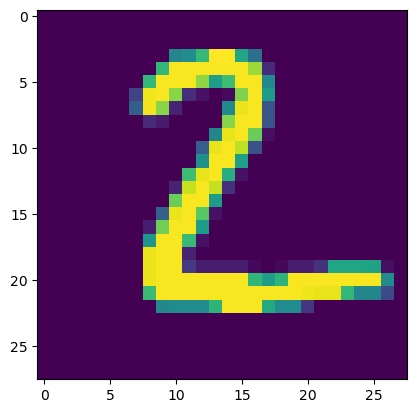

In [189]:
plt.imshow(test_images[1])

In [192]:
model.predict(test_images[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 416ms/step


array([2], dtype=int64)

## Question: 3 

Perform Regression Task using ANN

Note: You are feel free to use any Regression ML dataset

In [153]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [154]:
# Load the Boston Housing Prices dataset
boston = load_boston()
X = boston.data
y = boston.target

In [155]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [156]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [157]:
# Build the ANN model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

In [158]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [159]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
13/13 [==============================] - 1s 5ms/step - loss: 603.4724
Epoch 2/100
13/13 [==============================] - 0s 6ms/step - loss: 562.8638
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 513.0035
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 444.8871
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 361.0207
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 265.7224
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 174.3150
Epoch 8/100
13/13 [==============================] - 0s 5ms/step - loss: 110.4801
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 72.9692
Epoch 10/100
13/13 [==============================] - 0s 4ms/step - loss: 55.6176
Epoch 11/100
13/13 [==============================] - 0s 3ms/step - loss: 42.6069
Epoch 12/100
13/13 [==============================] - 0s 4ms/step - loss: 33.9627
Epoch 13/100
13/1

In [160]:
# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Mean Squared Error on Test Set: {loss}')

Mean Squared Error on Test Set: 11.466711044311523


In [162]:
# Make predictions
predictions = model.predict(X_test)

4/4 [==============================] - 0s 2ms/step


In [166]:
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 11.466710602324275
R^2 Score: 0.8436367236467857


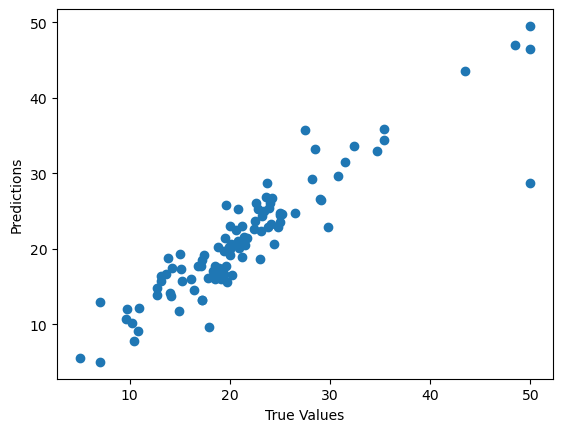

In [164]:
# Plot actual vs. predicted values
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()